In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('../data/interim/ethereum_processed.csv')

In [75]:
df.tail()

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
2795,1566.85,1669.59,1546.06,1644.18,501867.9033,8.131764e+08,2177800,266899.4092,4.329871e+08
2796,1644.19,1649.75,1562.01,1597.76,580136.6145,9.315987e+08,2597350,281372.5380,4.521358e+08
2797,1597.76,1691.50,1595.56,1623.77,645930.1419,1.062427e+09,2975844,332185.1295,5.465367e+08
2798,1623.78,1661.21,1583.12,1588.78,476178.8915,7.742101e+08,2283302,232389.8503,3.779784e+08
2799,1588.77,1604.40,1551.18,1573.81,131180.0178,2.074054e+08,615006,65262.9010,1.031972e+08


In [76]:
df['price_range'] = df['High'] - df['Low']
df['close_to_open'] = df['Close'] - df['Open']

In [77]:
df.head()

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,price_range,close_to_open
0,301.13,312.18,298.00,302.00,7030.71034,2.154655e+06,4522,6224.58999,1.908705e+06,14.18,0.87
1,302.00,311.79,283.94,293.96,9537.84646,2.858947e+06,5658,7452.43542,2.240813e+06,27.85,-8.04
2,293.31,299.90,278.00,290.91,2146.19773,6.200226e+05,1795,1537.97550,4.447136e+05,21.90,-2.40
3,289.41,300.53,282.85,299.10,2510.13871,7.428479e+05,2038,2186.68739,6.475061e+05,17.68,9.69
4,299.10,346.52,294.60,323.29,5219.44542,1.689472e+06,3925,4004.19967,1.297977e+06,51.92,24.19


In [78]:
# sns.pairplot(df)

In [79]:
df.isnull().sum()

Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Quote asset volume              0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
price_range                     0
close_to_open                   0
dtype: int64

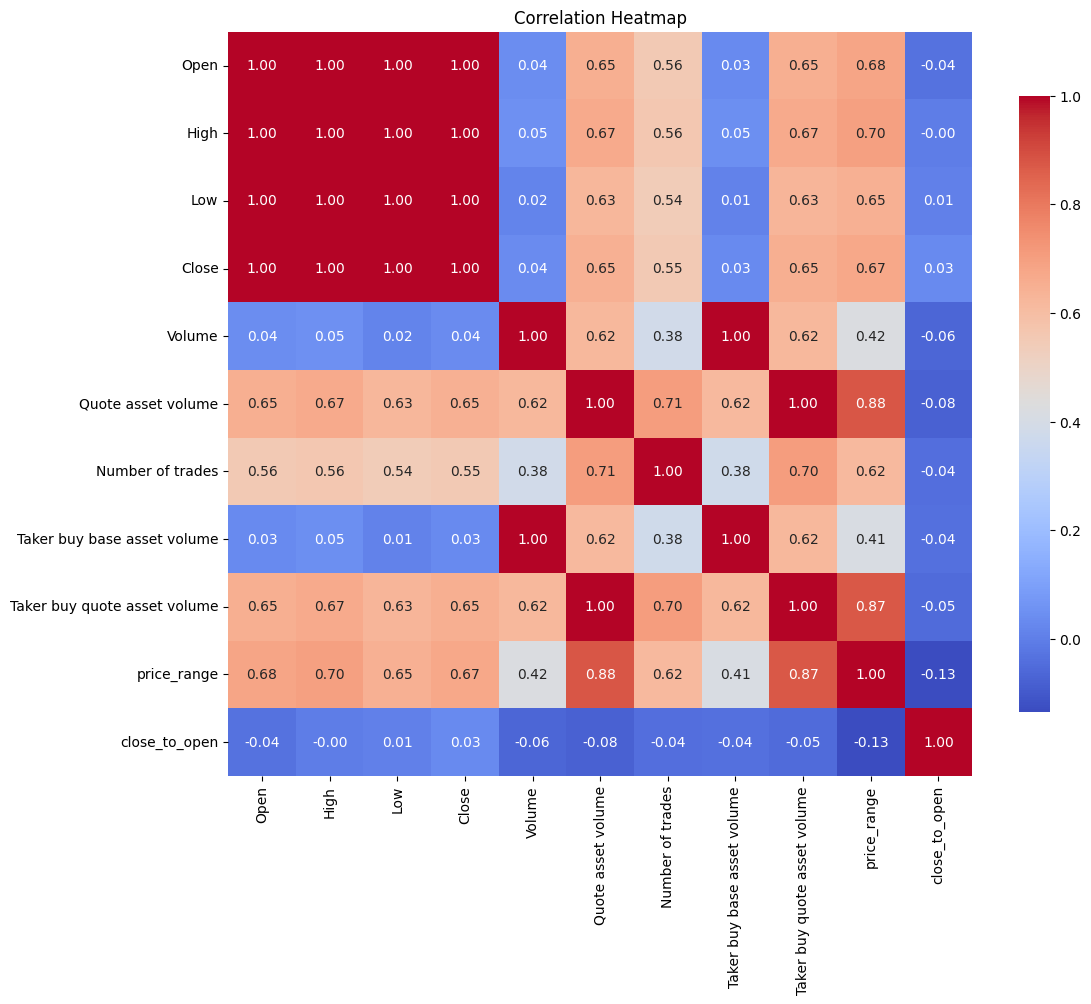

In [80]:
# plot heatmap to know which columns contribute more in predicting the close price
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap")
plt.show()

In [72]:
# Let's train linear regression model on the data to predict the close price, we will also scale the data using minmax scaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the data into train and test sets
X = df.drop(columns=["Close"]).values
y = df["Close"].values

# we will not use train_test_split as it is time series data so we will use the first 80% of the data for training and the rest for testing
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
# Scale the data using minmax scaler

print(X_train)

# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Train the model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Predict the close price
# y_pred = model.predict(X_test)

# # Calculate the mean squared error and rmse, maean absolute error
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# mae = np.mean(np.abs(y_test - y_pred))
# r2 = r2_score(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")
# print(f"Root Mean Squared Error: {rmse}")
# print(f"Mean Absolute Error: {mae}")


# # Plot the predicted vs actual close price
# plt.figure(figsize=(12, 6))
# plt.plot(y_test, label="Actual Close Price")
# plt.plot(y_pred, label="Predicted Close Price")
# plt.title("Predicted vs Actual Close Price")
# plt.xlabel("Time")
# plt.ylabel("Close Price")
# plt.legend()
# plt.show()

[[ 3.01130000e+02  3.12180000e+02  2.98000000e+02 ...  1.90870537e+06
   1.41800000e+01  8.70000000e-01]
 [ 3.02000000e+02  3.11790000e+02  2.83940000e+02 ...  2.24081326e+06
   2.78500000e+01 -8.04000000e+00]
 [ 2.93310000e+02  2.99900000e+02  2.78000000e+02 ...  4.44713612e+05
   2.19000000e+01 -2.40000000e+00]
 ...
 [ 1.73380000e+03  1.74400000e+03  1.63679000e+03 ...  3.08057406e+08
   1.07210000e+02 -7.14000000e+01]
 [ 1.66241000e+03  1.67065000e+03  1.64300000e+03 ...  1.55357300e+08
   2.76500000e+01 -5.53000000e+00]
 [ 1.65688000e+03  1.65766000e+03  1.62500000e+03 ...  1.73086611e+08
   3.26600000e+01 -1.03000000e+01]]


In [59]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, 
    AdaBoostRegressor, BaggingRegressor
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Define models and hyperparameters to tune
models = {
    "Linear Regression": (LinearRegression(), {}),
    "Ridge": (Ridge(), {"alpha": [0.1, 1.0, 10.0]}),
    "Lasso": (Lasso(), {"alpha": [0.1, 1.0, 10.0]}),
    "Elastic Net": (ElasticNet(), {"alpha": [0.1, 1.0, 10.0], "l1_ratio": [0.1, 0.5, 0.9]}),
    "Support Vector Regression": (SVR(), {"C": [0.1, 1, 10], "kernel": ['linear', 'rbf'], "gamma": ['scale', 'auto']}),
    "Random Forest": (RandomForestRegressor(), {"n_estimators": [50, 100], "max_depth": [None, 10, 20]}),
    "Gradient Boosting": (GradientBoostingRegressor(), {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1]}),
    "AdaBoost": (AdaBoostRegressor(), {"n_estimators": [50, 100]}),
    "Bagging": (BaggingRegressor(), {"n_estimators": [10, 50, 100]}),
    "Decision Tree": (DecisionTreeRegressor(), {"max_depth": [None, 10, 20]}),
    "KNN": (KNeighborsRegressor(), {"n_neighbors": [3, 5, 7]}),
    "XGBoost": (XGBRegressor(), {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1]}),
    "LightGBM": (LGBMRegressor(), {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1]})
}

# Collect model performance results
results_list = []

for name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results_list.append({
        "Model": name,
        "Best Params": grid_search.best_params_,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results_list)

# Sort by RMSE for better comparison
results_df = results_df.sort_values(by="RMSE", ascending=True).reset_index(drop=True)

# Print the DataFrame as a table
print(results_df)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits


KeyboardInterrupt: 

c:\Users\fahim\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.921e+07, tolerance: 5.639e+07
  model = cd_fast.enet_coordinate_descent(


Best Lasso alpha: 0.00339322177189533
Best Lasso CV Score: 153306.3626259364
Best Ridge alpha: 0.00012648552168552957
Best Ridge CV Score: 153232.59710272297
Lasso Mean Squared Error: 605473.8569101524
Lasso Root Mean Squared Error: 778.1220064425323
Lasso Mean Absolute Error: 532.8853964043838
Lasso R2 Score: 0.9985498413024226
Ridge Mean Squared Error: 608584.9842954929
Ridge Root Mean Squared Error: 780.1185706644169
Ridge Mean Absolute Error: 534.3330326514096
Ridge R2 Score: 0.9985423899015312


c:\Users\fahim\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.921e+07, tolerance: 5.639e+07
  model = cd_fast.enet_coordinate_descent(


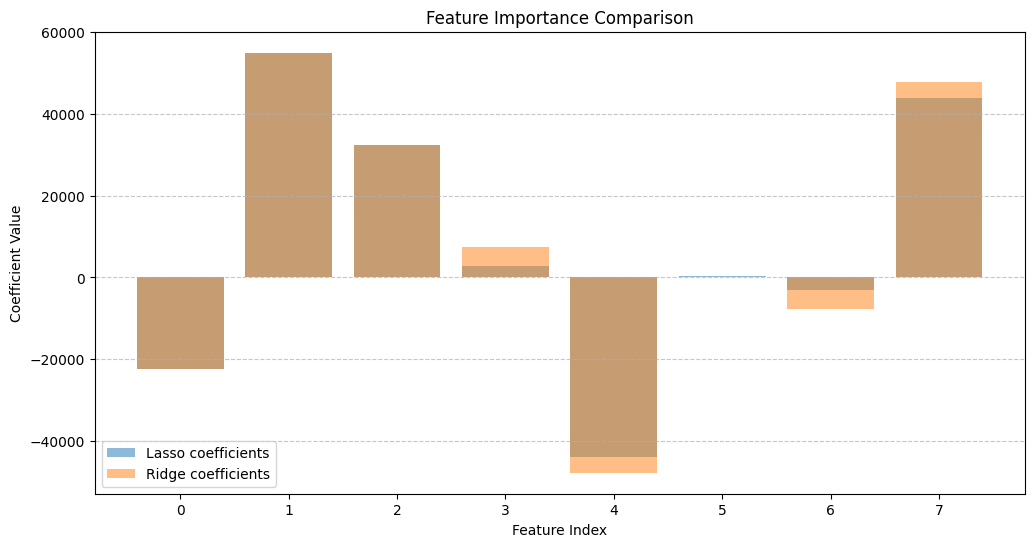

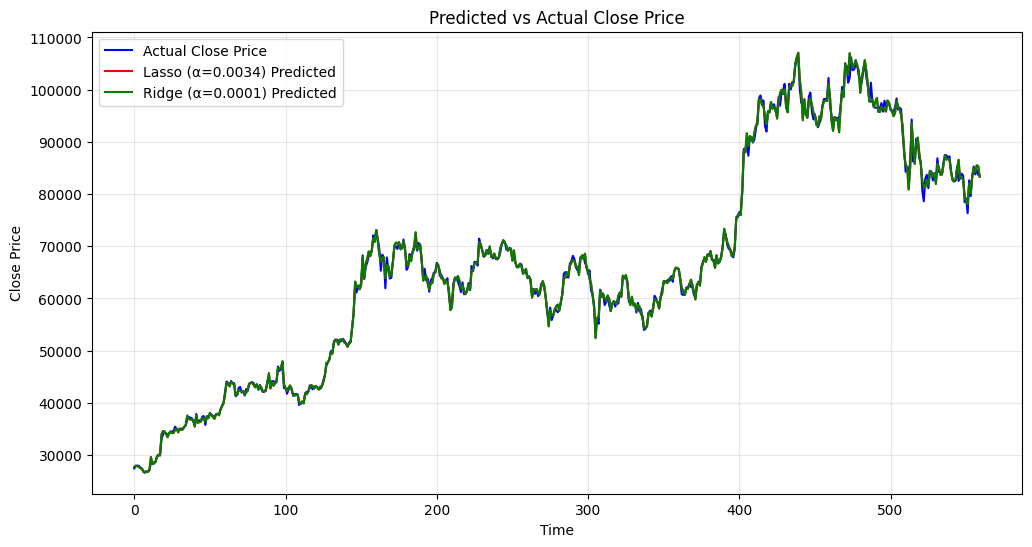

c:\Users\fahim\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.623e+08, tolerance: 1.390e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\fahim\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.721e+08, tolerance: 1.434e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\fahim\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

Lasso 5-Fold CV Mean RMSE: 497.3280738613179
Ridge 5-Fold CV Mean RMSE: 500.2828187851704


c:\Users\fahim\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.921e+07, tolerance: 5.639e+07
  model = cd_fast.enet_coordinate_descent(


In [36]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define cross-validation strategy - research indicates 5-10 folds is optimal
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# LASSO hyperparameter tuning
# Research shows that a logarithmic scale of alpha values is more effective
# Based on research by Friedman et al. (2010) and Tibshirani (1996)
lasso_params = {
    'alpha': np.logspace(-4, 1, 50)  # Log scale from 0.0001 to 10
}

lasso_grid = GridSearchCV(
    Lasso(max_iter=10000, random_state=42),
    lasso_params,
    cv=cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

lasso_grid.fit(X_train, y_train)
best_lasso_alpha = lasso_grid.best_params_['alpha']
print(f"Best Lasso alpha: {best_lasso_alpha}")
print(f"Best Lasso CV Score: {-lasso_grid.best_score_}")

# RIDGE hyperparameter tuning
# Similar approach for Ridge, based on research by Hoerl & Kennard (1970)
ridge_params = {
    'alpha': np.logspace(-4, 1, 50)  # Log scale from 0.0001 to 10
}

ridge_grid = GridSearchCV(
    Ridge(max_iter=10000, random_state=42),
    ridge_params,
    cv=cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

ridge_grid.fit(X_train, y_train)
best_ridge_alpha = ridge_grid.best_params_['alpha']
print(f"Best Ridge alpha: {best_ridge_alpha}")
print(f"Best Ridge CV Score: {-ridge_grid.best_score_}")

# Train the models with the best parameters
lasso = Lasso(alpha=best_lasso_alpha, max_iter=10000, random_state=42)
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
print(f"Lasso Mean Squared Error: {lasso_mse}")
print(f"Lasso Root Mean Squared Error: {lasso_rmse}")
print(f"Lasso Mean Absolute Error: {lasso_mae}")
print(f"Lasso R2 Score: {lasso_r2}")

ridge = Ridge(alpha=best_ridge_alpha, max_iter=10000, random_state=42)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
print(f"Ridge Mean Squared Error: {ridge_mse}")
print(f"Ridge Root Mean Squared Error: {ridge_rmse}")
print(f"Ridge Mean Absolute Error: {ridge_mae}")
print(f"Ridge R2 Score: {ridge_r2}")

# Compare the feature importance
if X_train.shape[1] <= 20:  # Only plot if there aren't too many features
    plt.figure(figsize=(12, 6))
    feature_names = range(X_train.shape[1])
    plt.bar(feature_names, lasso.coef_, alpha=0.5, label='Lasso coefficients')
    plt.bar(feature_names, ridge.coef_, alpha=0.5, label='Ridge coefficients')
    plt.legend()
    plt.title('Feature Importance Comparison')
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient Value')
    plt.xticks(feature_names)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot the predicted vs actual close price for lasso and ridge
plt.figure(figsize=(12, 6))
plt.plot(y_test.values if hasattr(y_test, 'values') else y_test, label="Actual Close Price", color='blue')
plt.plot(lasso_pred, label=f"Lasso (α={best_lasso_alpha:.4f}) Predicted", color='red')
plt.plot(ridge_pred, label=f"Ridge (α={best_ridge_alpha:.4f}) Predicted", color='green')
plt.title("Predicted vs Actual Close Price")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Evaluate models with cross-validation to ensure robustness
from sklearn.model_selection import cross_val_score

lasso_cv_scores = cross_val_score(
    Lasso(alpha=best_lasso_alpha, max_iter=10000, random_state=42),
    np.concatenate((X_train, X_test)),
    np.concatenate((y_train, y_test)),
    cv=5,
    scoring='neg_mean_squared_error'
)

ridge_cv_scores = cross_val_score(
    Ridge(alpha=best_ridge_alpha, max_iter=10000, random_state=42),
    np.concatenate((X_train, X_test)),
    np.concatenate((y_train, y_test)),
    cv=5,
    scoring='neg_mean_squared_error'
)

print(f"Lasso 5-Fold CV Mean RMSE: {np.sqrt(-lasso_cv_scores.mean())}")
print(f"Ridge 5-Fold CV Mean RMSE: {np.sqrt(-ridge_cv_scores.mean())}")